In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
sales_data = pd.read_csv(r"F:\python\Bigmart.csv")
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
sales_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## 1.Data Cleaning

All columns have 8523 entries except item weight and Outlet size.
Let remove those null values

## Item weight

In [5]:
sales_data['Item_Weight'].isnull().sum()

1463

<AxesSubplot:xlabel='Item_Weight'>

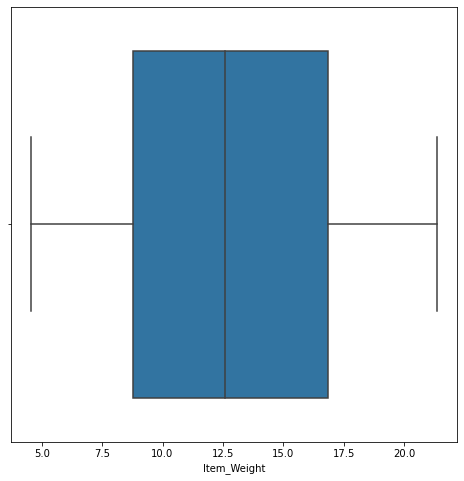

In [6]:
plt.figure(figsize=(8,8))
sns.boxplot(x ='Item_Weight',
            data=sales_data)

There is no outliers. so we can use mean to replace

In [7]:
sales_data['Item_Weight'] = sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean())
sales_data['Item_Weight'].isnull().sum()

0

## Outlet size

In [8]:
sales_data['Outlet_Size'].isnull().sum()

2410

In [9]:
sales_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

since it is categorical value, we replace with mode

In [10]:
sales_data['Outlet_Size'] = sales_data['Outlet_Size'].fillna(sales_data['Outlet_Size'].mode()[0])
sales_data['Outlet_Size'].isnull().sum()

0

## 2.Exploratory Data Analysis

As we taken care of null values, we can look for junk values

In [11]:
sales_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Lets check the object data types for junk values

In [12]:
sales_data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [13]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

As LF,lowfat and reg are another representaion of Low fat and Regular. Lets replace those values. 

In [14]:
sales_data.replace({'Item_Fat_Content' : {'low fat' : 'Low Fat',
                                         'LF' : 'Low Fat',
                                         'reg' : 'Regular'}},inplace=True)
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
sales_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [16]:
sales_data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [17]:
sales_data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

## 3.Univariate Analysis

We can move to analysing as we removed junk data's

## fat content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

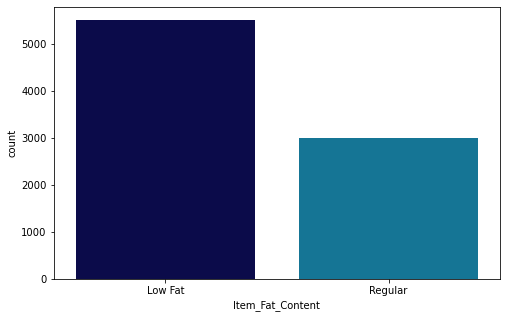

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='Item_Fat_Content',
              data=sales_data,
              palette='ocean')

## Item type

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

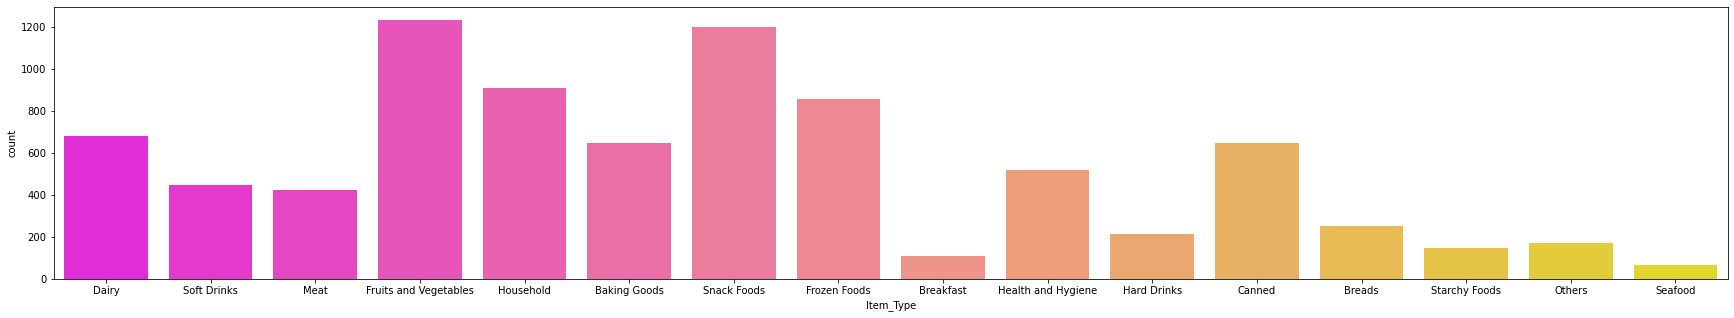

In [19]:
plt.figure(figsize=(30,5))
sns.countplot(x='Item_Type',
              data=sales_data,
              palette='spring')

## Outlet Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

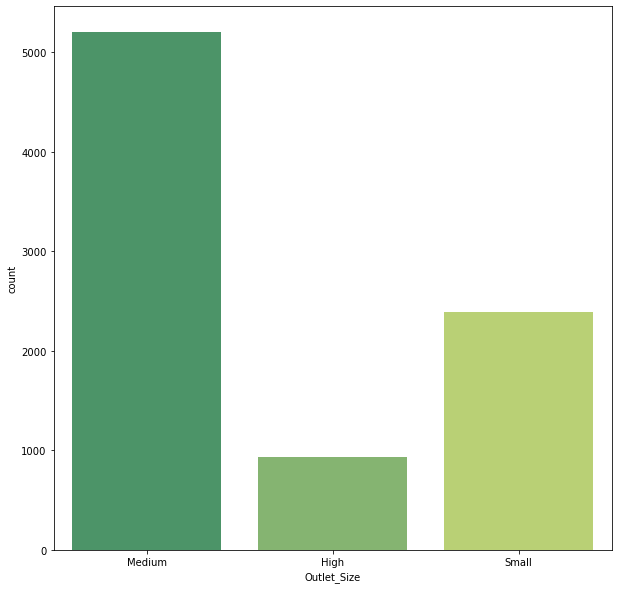

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x='Outlet_Size',
              data=sales_data,
              palette='summer')

## Outlet Location Type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

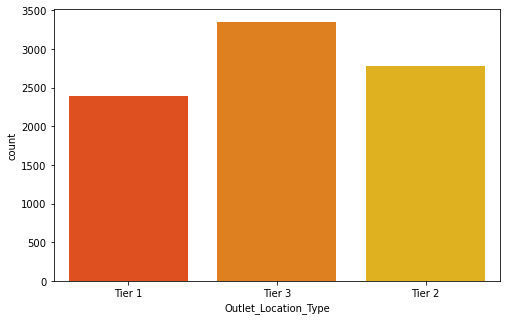

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Location_Type',
              data=sales_data,
              palette='autumn')

## Outlet Type

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

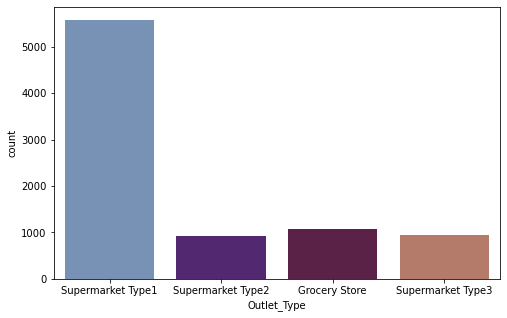

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Type',
              data=sales_data,
              palette='twilight')

## 4.Bivariate Analysis

## Item Fat Content and sales

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

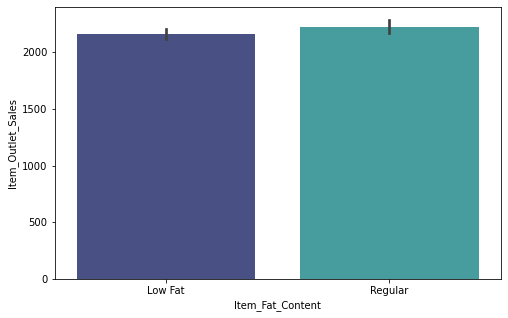

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x='Item_Fat_Content',
            y='Item_Outlet_Sales'
            ,data=sales_data
            ,palette='mako')

## Item Visibility and sales

Text(0, 0.5, 'Item outlet store')

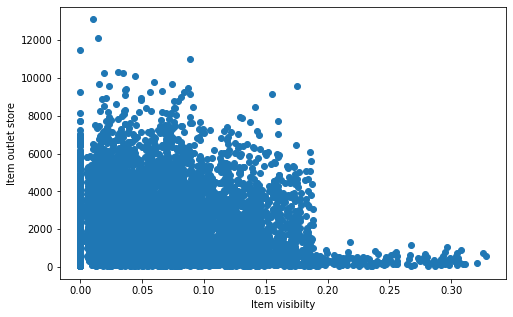

In [24]:
plt.figure(figsize=(8,5))
plt.scatter(x='Item_Visibility',
            y='Item_Outlet_Sales',
            data=sales_data)
plt.xlabel("Item visibilty")
plt.ylabel("Item outlet store")

## Item visibility cannot be 0.

Text(0, 0.5, 'Item outlet store')

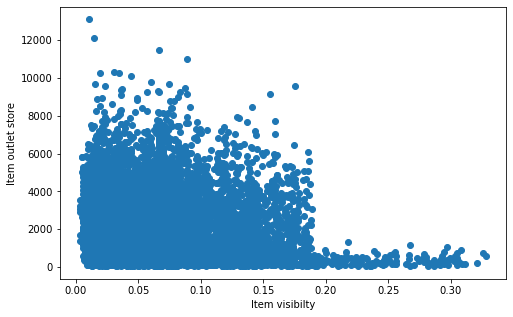

In [25]:
sales_data["Item_Visibility"] = sales_data['Item_Visibility'].replace(0,sales_data['Item_Visibility'].mean())

plt.figure(figsize=(8,5))
plt.scatter(x='Item_Visibility',
            y='Item_Outlet_Sales',
            data=sales_data)
plt.xlabel("Item visibilty")
plt.ylabel("Item outlet store")

## Item type and sales

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

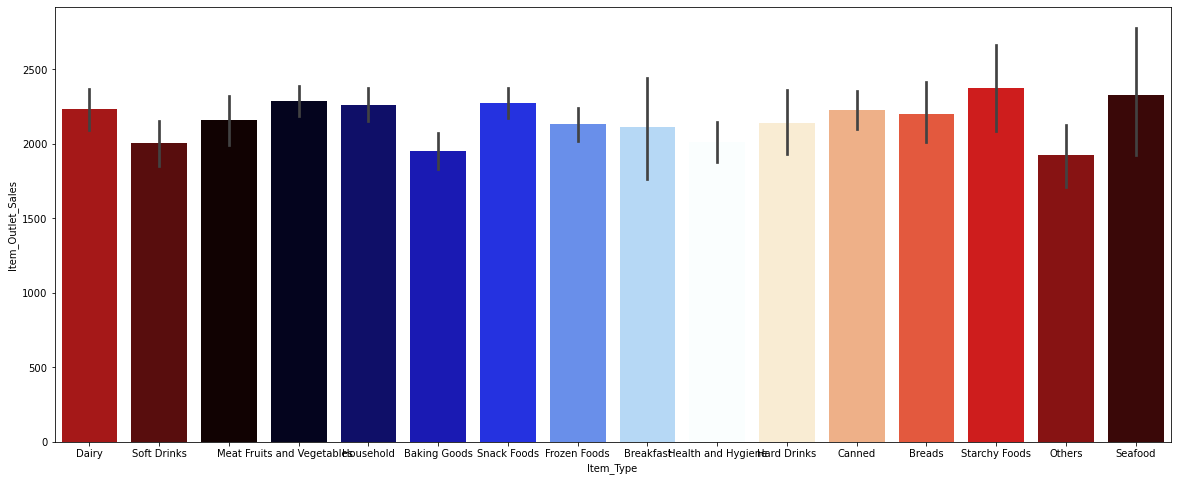

In [26]:
plt.figure(figsize=(20,8))
sns.barplot(x='Item_Type',
            y='Item_Outlet_Sales',
            data=sales_data,
            palette='flag')

## MRP and sales

Text(0, 0.5, 'Item Outlet Sales')

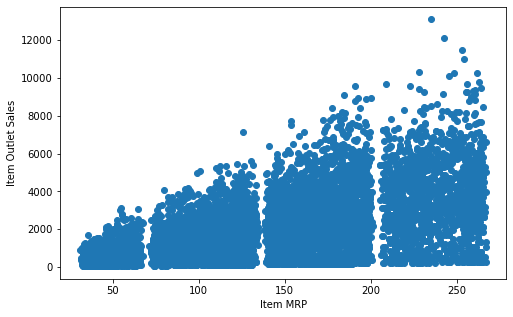

In [27]:
plt.figure(figsize=(8,5))
plt.scatter(x='Item_MRP',
            y='Item_Outlet_Sales',
            data=sales_data)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

## Outlet size and sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

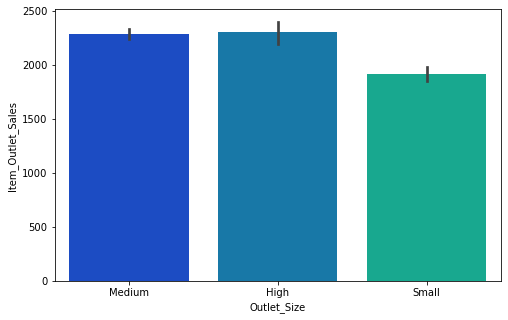

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',
            y='Item_Outlet_Sales',
            data=sales_data,
            palette='winter')

## Outlet location and sales

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

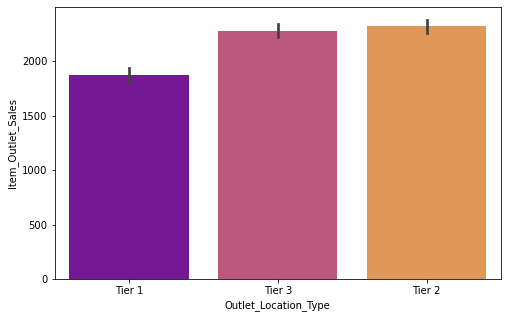

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',
            y='Item_Outlet_Sales'
            ,data=sales_data,
            palette='plasma')

## 5.Multivariate Analysis

## Item type classified by fat content to sales

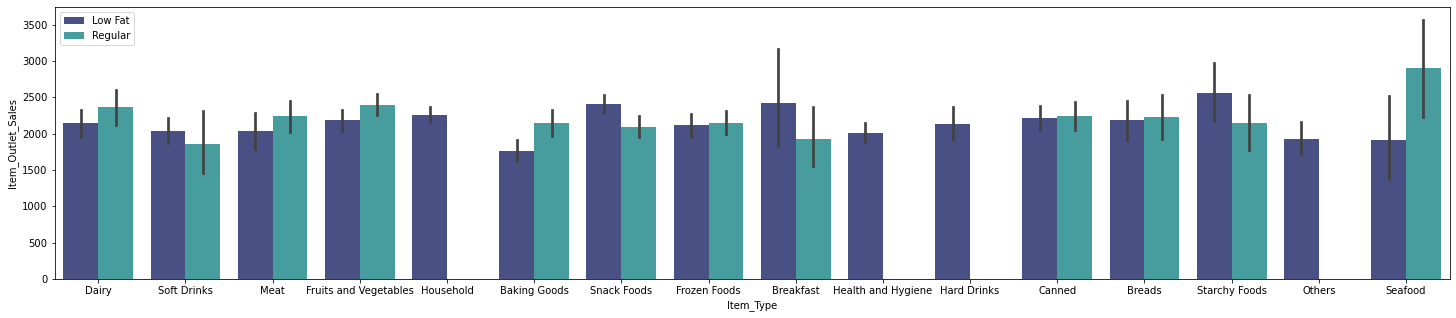

In [30]:
plt.figure(figsize=(25,5))
sns.barplot(x='Item_Type',
            y='Item_Outlet_Sales',
            hue='Item_Fat_Content',
            data=sales_data,
            palette='mako')
plt.legend()

## Location type classified by outlet type to sales

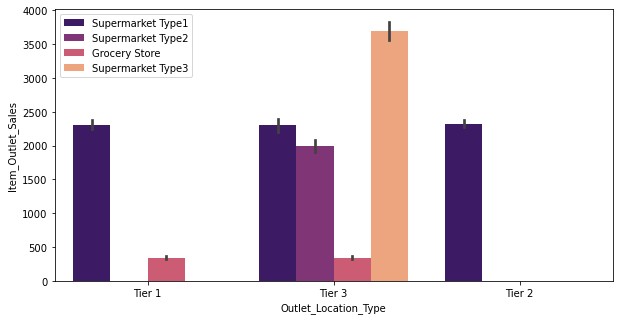

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type',
            y='Item_Outlet_Sales',
            hue='Outlet_Type',
            data=sales_data,
            palette='magma')
plt.legend()

## 6.Feature Modelling

In [32]:
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size',
           'Outlet_Type','Item_Type']
for i in var_mod:
    sales_data[i]=le.fit_transform(sales_data[i])
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.066132,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.93,0,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052


In [33]:
sales_data = sales_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
sales_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [34]:
X = sales_data[['Item_Weight','Item_Fat_Content','Item_Visibility',
           'Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type',
           'Outlet_Type']]
y = sales_data['Item_Outlet_Sales']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=42)

## Linear regression

In [35]:
features= ['Item_Weight','Item_Fat_Content','Item_Visibility',
           'Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type',
           'Outlet_Type']
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [36]:
y_pred = LR.predict(X_test)
coef2 = pd.Series(LR.coef_,features).sort_values()
coef2

Item_Visibility        -1738.183595
Outlet_Location_Type    -423.512293
Outlet_Size             -350.242623
Item_Weight               -2.759914
Item_Type                  0.269235
Item_MRP                  15.621971
Item_Fat_Content          66.321241
Outlet_Type              989.072590
dtype: float64

In [37]:
LR.intercept_

-191.94356098429125

<AxesSubplot:>

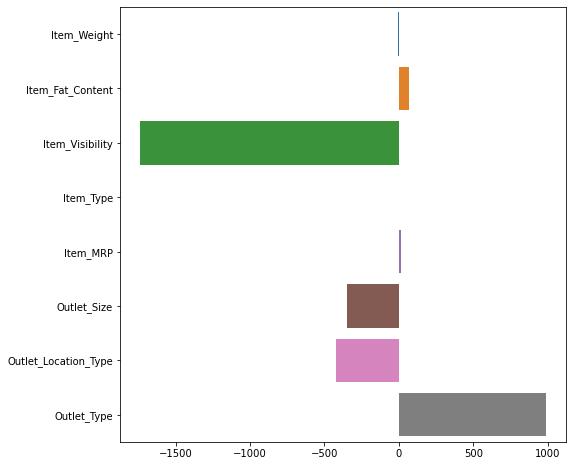

In [38]:
plt.figure(figsize=(8,8))
sns.barplot(x=LR.coef_,y=features)

## R-Squared

In [39]:
r2 = r2_score(y_test,y_pred)
r2

0.5245431761329483

## Mean absolute error(MAE)

In [40]:
MAE= metrics.mean_absolute_error(y_test,y_pred)
MAE

855.3812121217638

## Mean squared error(MSE)

In [41]:
MSE= metrics.mean_squared_error(y_test,y_pred)
MSE

1292277.4152393055

## Root Mean Squared Error

In [42]:
rmse = np.sqrt(MSE)
rmse

1136.7838032094342

## Results
1. Item_MRP clearly maximises the Outlet sales.
2. Item visibility has higher impact on sales followed by outlet type,location and size
3.  Outlet Type being SuperMarket or Grocery Store also depicts the Outlet Sales.